<a href="https://colab.research.google.com/github/ColinKlich/ML-Training/blob/main/Stock_Price_Prediction_Project_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/sample_data/all_stocks_5yr.csv', delimiter=',', on_bad_lines='skip')
print(data.shape)
print(data.sample(7))

(592263, 7)
              date    open      high      low     close     volume  Name
370052  2018-02-06  150.87  157.9700  147.340  157.9400  1982005.0   MCO
337707  2014-08-22   63.81   64.2500   63.600   63.9000  1285725.0    LB
10520   2014-11-18   50.31   51.2700   50.230   51.2600  2333286.0   ADI
579345  2015-03-11   69.23   71.4800   69.042   69.7800  1276798.0  VRSK
96583   2016-02-12   77.60   78.9000   76.910   78.8500  2168252.0   CAH
381574  2013-11-07   19.25   19.2833   19.010   19.0366  5665653.0  MNST
35036   2018-01-10   82.76   83.3500   82.130   82.6000   851544.0  ALLE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592263 entries, 0 to 592262
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    592263 non-null  object 
 1   open    592253 non-null  float64
 2   high    592256 non-null  float64
 3   low     592256 non-null  float64
 4   close   592262 non-null  float64
 5   volume  592262 non-null  float64
 6   Name    592262 non-null  object 
dtypes: float64(5), object(2)
memory usage: 31.6+ MB


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592263 entries, 0 to 592262
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    592263 non-null  datetime64[ns]
 1   open    592253 non-null  float64       
 2   high    592256 non-null  float64       
 3   low     592256 non-null  float64       
 4   close   592262 non-null  float64       
 5   volume  592262 non-null  float64       
 6   Name    592262 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 31.6+ MB


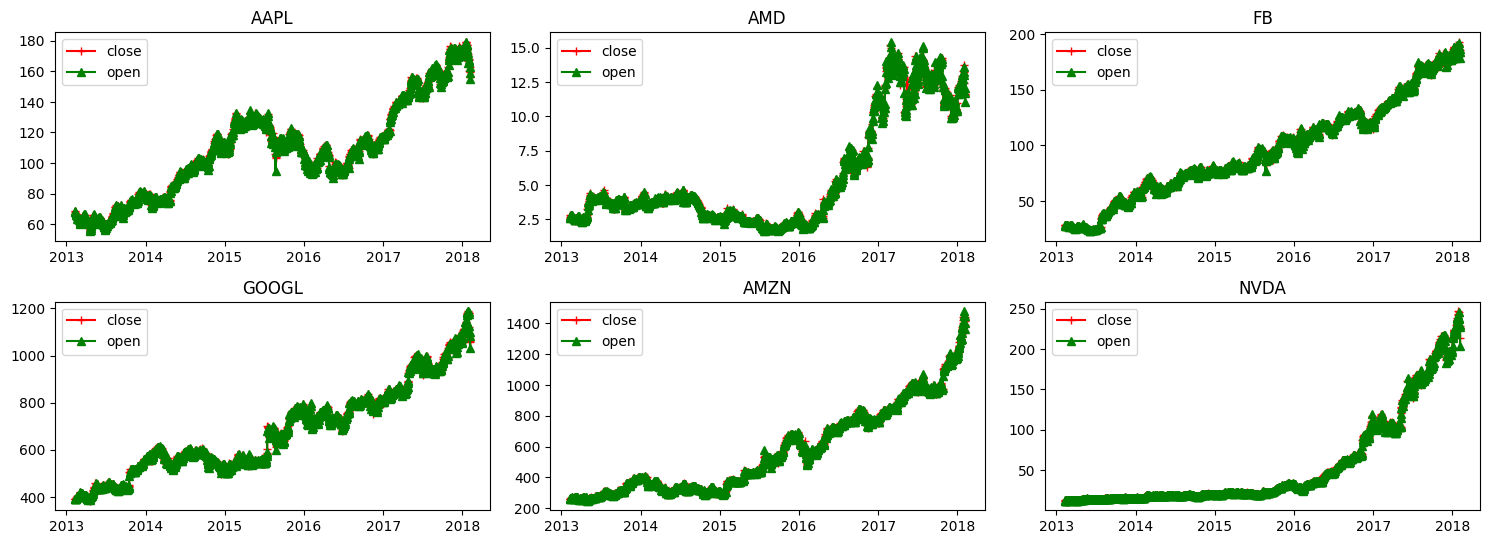

In [6]:
data['date'] = pd.to_datetime(data['date'])
# date vs open
# date vs close

# Define the list of companies you want to plot
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
	plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
	plt.title(company)
	plt.legend()
	plt.tight_layout()

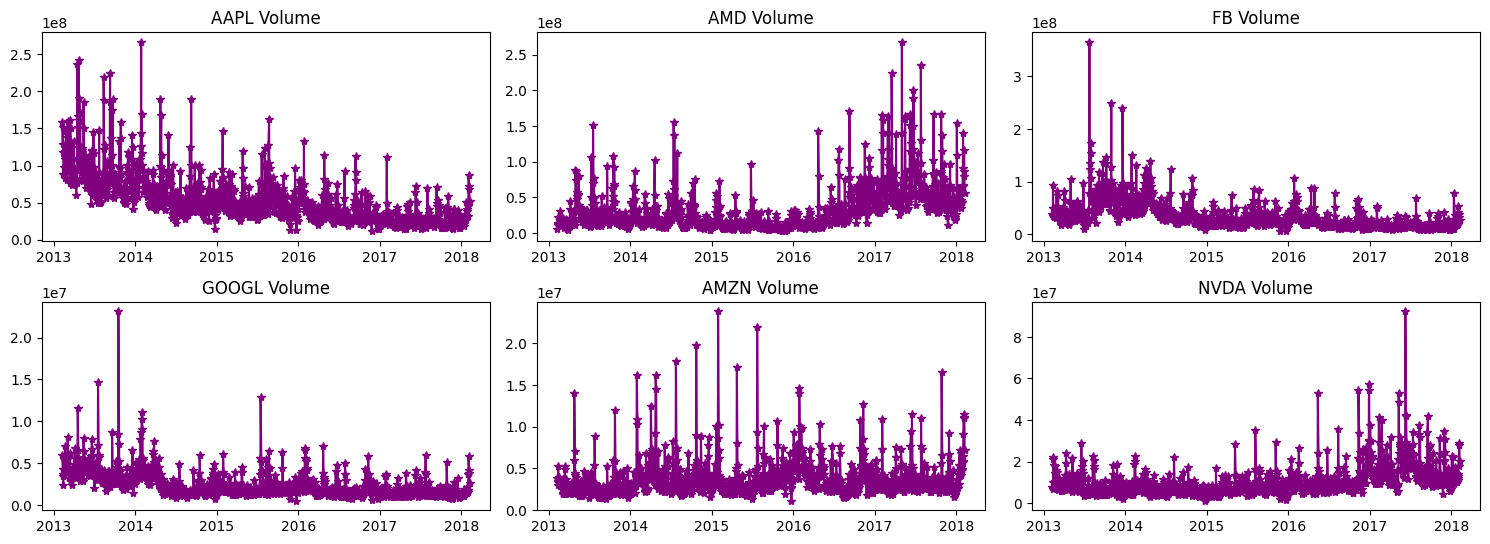

In [7]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['volume'], c='purple', marker='*')
	plt.title(f"{company} Volume")
	plt.tight_layout()

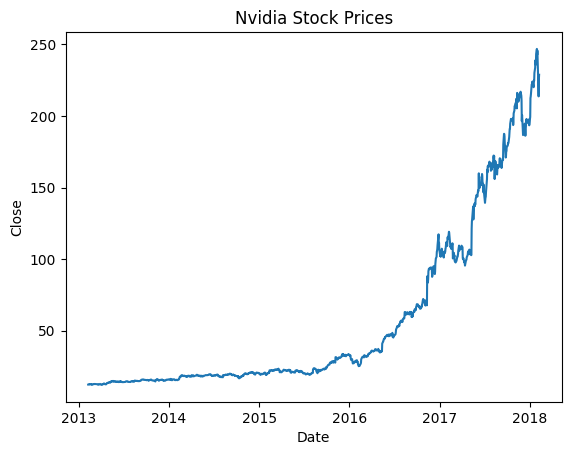

In [9]:
apple = data[data['Name'] == 'NVDA']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
& (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Nvidia Stock Prices")
plt.show()

In [10]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [13]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0232
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0033
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0025
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0026
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0025
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0025
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0032
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0023
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0025
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0023


In [14]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step
MSE 137.11034366047878
RMSE 11.709412609541042


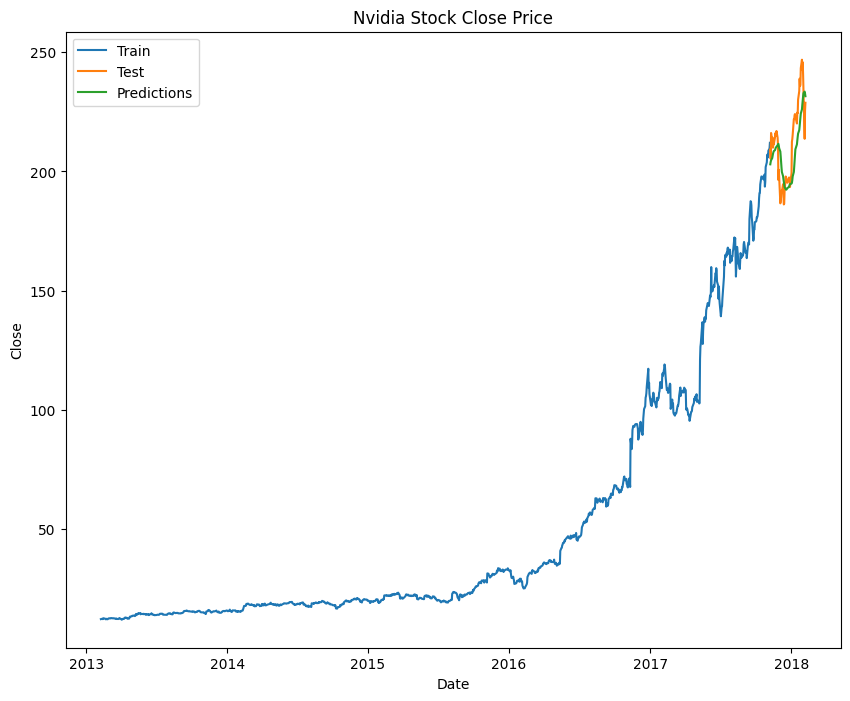

In [16]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Nvidia Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])